# Exploring Land Cover Data (Impact Observatory)

{opticon}`tag`
{bdg-primary}`General`
{bdg-secondary}`Exploration`
{bdg-warning}`Standard`
{bdg-info}`Python`

<p align="left">
    <a href="https://github.com/eds-book-gallery/b128b282-dee7-44a7-bc21-f1fd21452a83/blob/main/LICENSE">
        <img alt="license" src="https://img.shields.io/badge/license-MIT-yellow.svg">
    </a>
    <a href="https://github.com/eds-book-gallery/b128b282-dee7-44a7-bc21-f1fd21452a83/actions/workflows/render.yaml">
        <img alt="render" src="https://github.com/eds-book-gallery/b128b282-dee7-44a7-bc21-f1fd21452a83/actions/workflows/render.yaml/badge.svg">
    </a>
    <a href="https://github.com/eds-book-gallery/b128b282-dee7-44a7-bc21-f1fd21452a83/pull/2">
        <img alt="review" src="https://img.shields.io/badge/view-review-purple">
    </a>
    <br/>
</p>

<p align="left">
    <a href="http://mybinder.org/v2/gh/eds-book-gallery/b128b282-dee7-44a7-bc21-f1fd21452a83/main?labpath=notebook.ipynb">
        <img alt="binder" src="https://mybinder.org/badge_logo.svg">
    </a>
    <a href="https://replay.notebooks.egi.eu/v2/gh/eds-book-gallery/b128b282-dee7-44a7-bc21-f1fd21452a83/main?labpath=notebook.ipynb">
        <img alt="binder" src="https://img.shields.io/badge/launch-EGI%20binder-F5A252.svg?logo=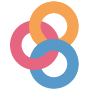">
    </a>
    <br/>
</p>

<p align="left">
    <a href="https://w3id.org/ro-id/b128b282-dee7-44a7-bc21-f1fd21452a83">
        <img alt="RoHub" src="https://img.shields.io/badge/RoHub-FAIR_Executable_Research_Object-2ea44f?logo=Open+Access&logoColor=blue">
    </a>
    <a href="https://zenodo.org/badge/latestdoi/514340098">
        <img alt="doi" src="https://zenodo.org/badge/514340098.svg">
    </a>
</p>


## Context
### Purpose
Introduce manipulation and exploratory analysis of classified land use and cover data, using example [data created by Impact Observatory](https://planetarycomputer.microsoft.com/dataset/io-lulc-9-class) from ESA Sentinel-2 imagery. 

### Dataset description
There are now many classified (categorical) land cover data products freely available that are useful for Environmental Data Science. These include:
- [ESA CCI land cover](https://www.esa-landcover-cci.org/), 300m spatial resolution global extent for years 1992-2015 
- [Copernicus Global Land Cover](https://zenodo.org/communities/copernicus-land-cover), 100m spatial resolution global extent for years 2015-2019 
- [USGS LCMAP](https://www.usgs.gov/special-topics/lcmap/data), 30m spatial resolution for USA for years 1985-2020
- [UKCEH LCMs](https://www.ceh.ac.uk/data/ukceh-land-cover-maps), various spatial resolutions for UK for various years 1990-2020
- [mapbiomas](https://mapbiomas.org/en), 30m spatial resolution for Brazil for years 1985-2020
- [Impact Observatory](https://planetarycomputer.microsoft.com/dataset/io-lulc-9-class), 10m spatial resolution global extent for 2017-2021

These products are provided as 2D rasters (spatial) or 3D data cubes (spatio-temporal). The number and classification of discrete land cover classes varies between products, but at their most basic will distinguish between broad land covers such as 'crops', 'forest' and 'built-up'. The nominal (categorical) character of the data influences the types of analysis appropriate. 

This notebook uses data created by [Impact Observatory](https://www.impactobservatory.com/). [The data](https://planetarycomputer.microsoft.com/dataset/io-lulc-9-class) are a time series for 2017-2021 of annual global land use and land cover (LULC) mapped at 10m spatial resolution. The data are [derived](https://www.impactobservatory.com/global_maps) from [ESA Sentinel-2](https://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-2) imagery with each annual map specifying individual pixels as belonging to one of 9 LULC classes. The Impact Observatory LULC model uses deep learning methods to infer a single annual LULC class for each pixel in a Sentinel-2 image. Each annual global LULC map is produced by aggregating multiple inferences for images from across a given year (requiring processing approximately 2 million images to create each annual map).

### Highlights
* <a href=#section1>Fetch land cover product data</a> from an online repository
* <a href=#section2>Visualise the data</a> (maps and spatio-temporal plots)
* <a href=#section3>Analyse aggregate change</a> through bar charts and similar visualisation 
* <a href=#section4>Analyse pixel-by-pixel change</a> including use of sankey diagrams
* <a href=#section5>Analyse zonal change</a> using ancillary vector data

### Contributions

#### Notebook
- James Millington (author), Dept of Geography, King's College London, [@jamesdamillington](https://github.com/jamesdamillington)
- Anne Fouilloux (reviewer), Dept of Geosciences, University of Oslo, [@annefou](https://github.com/annefou)
- Amandine Debus (reviewer), Dept of Geography, University of Cambridge, [@aedebus](https://github.com/aedebus)

#### Dataset originator/creator
- [Esri](https://www.esri.com/) (licensor)
- [Impact Observatory](https://www.impactobservatory.com/) (processor, producer, licensor)
- [Microsoft](https://planetarycomputer.microsoft.com/) (host)

The data are available under a [Creative Commons BY-4.0 license](https://creativecommons.org/licenses/by/4.0/).

#### Dataset reference and documentation
```{bibliography}
  :style: plain
  :list: bullet
  :filter: topic % "b128b282-dee7-44a7-bc21-f1fd21452a83"
```

#### Code
- Data loading code built on snippet [from @acocac](https://github.com/alan-turing-institute/environmental-ds-book/issues/99#issuecomment-1185550940) via [ODC.stac docs](https://odc-stac.readthedocs.io/en/latest/notebooks/stac-load-e84-aws.html) and a [Microsoft Planetary example notebook](https://planetarycomputer.microsoft.com/dataset/io-lulc#Example-Notebook).

## Load libraries

In [1]:
#system
import os
import warnings
warnings.filterwarnings(action='ignore')

#data handling
import pystac_client
import odc.stac
from pystac.extensions.item_assets import ItemAssetsExtension

import geopandas as gpd
import rasterio as rio
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import xarray as xr
import rioxarray

#visualisation
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import holoviews as hv
import hvplot.pandas  
from holoviews import opts, dim

#data analysis
from sklearn import metrics  #for confusion matrix
from rasterstats import zonal_stats

### Set project structure
The next cell creates a separate folder to save any notebook outputs you should wish (e.g. below we use this directory  in the demo of how you might load data from a local file).

In [2]:
notebook_folder = './notebook'
if not os.path.exists(notebook_folder):
    os.makedirs(notebook_folder)

<a name="section1"></a>
## 1. Fetch and Load Data
This notebook uses annual land cover [data from Impact Observatory](https://planetarycomputer.microsoft.com/dataset/io-lulc-9-class), 10m spatial resolution and global extent for 2017-2021. These data are hosted online by [Microsoft's Planetary Computer](https://planetarycomputer.microsoft.com/) which enable you, the user, to run the code in the cloud (e.g. via binder). 

Below we will use the [`pystac-client`](https://pystac-client.readthedocs.io/en/latest/) package to access [`STAC`](https://stacspec.org/en/) information from the [Planetary Computer API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/), then read it using the [`odc-stac`](https://odc-stac.readthedocs.io/en/latest/) package. In doing so we will:
- fetch data for a study area in Mato Grosso, Brazil
- resample the original 10m spatial resolution to 300m (to decrease execution times in this example notebook) 

:::{note}
Fetching the data from the cloud adds some steps that would not be necessary had you already downloaded the data to your local machine. Consequently, in future for your own work you might ignore the _Cloud Data_ code blocks and start from _Local Data_.

### Cloud Data

First we need to specify the location and extent of study area to fetch the relevant data. We do this by specying a bounding box around the center point of the study area.

In [3]:
#specify center point of the study area
x, y = (-56.1, -12.2)  #area in MT

#define a square bounding box for the study area
km2deg = 1.0 / 111 #1 deg corresponds to approximately 111 km at the equator
xd = 200 * km2deg
yd = 325 * km2deg
study_bbox_coords = [[x - xd, y - yd], [x - xd, y + yd], [x + xd, y + yd], [x + xd, y - yd]]

#view bounding box
study_bbox_coords

[[-57.9018018018018, -15.127927927927928],
 [-57.9018018018018, -9.27207207207207],
 [-54.2981981981982, -9.27207207207207],
 [-54.2981981981982, -15.127927927927928]]

We can then visualise the location and extent of the study area [using `hvPlot`](https://hvplot.holoviz.org/user_guide/Geographic_Data.html). 

In [4]:
#create a GeoPandas GeoDataFrame 
study_poly = Polygon(study_bbox_coords)

crs = {'init': 'epsg:4326'}
sa_gpd = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[study_poly])  

#interactive plot using hvplot.pandas
sa_gpd_interactive = sa_gpd.hvplot(
    geo=True,crs=sa_gpd.crs.to_epsg(),alpha=0.5, xlim=(-75, -35), ylim=(-30, 10),  tiles='CartoLight')
sa_gpd_interactive

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]

With our study area defined, we can now query Microsoft Planetary Computer data that is available for this location [using `pystac-client`](https://pystac-client.readthedocs.io/en/latest/).

In [5]:
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

#https://pystac-client.readthedocs.io/en/latest/tutorials/pystac-client-introduction.html#API-Search
query = catalog.search(
    collections=["io-lulc-9-class"],
    limit=100,
    bbox=study_poly.bounds
)

#https://pystac-client.readthedocs.io/en/latest/tutorials/pystac-client-introduction.html#Items
items = list(query.get_items())
print(f"Found: {len(items):d} datasets")

print(items)

Found: 6 datasets
[<Item id=21L-2022>, <Item id=21L-2021>, <Item id=21L-2020>, <Item id=21L-2019>, <Item id=21L-2018>, <Item id=21L-2017>]


For the available datasets we can access and view the associated metadata. 

In [6]:
stac_json = query.get_all_items_as_dict()     # Convert STAC items into a GeoJSON FeatureCollection
gdf = gpd.GeoDataFrame.from_features(stac_json)  #convert GeoJSON to GeoPandas to view nicely
gdf.head()

geometry datetime  \
0  POLYGON ((-54.00000 -8.00195, -54.00000 -16.00...     None   
1  POLYGON ((-54.00000 -8.00195, -54.00000 -16.00...     None   
2  POLYGON ((-54.00000 -8.00195, -54.00000 -16.00...     None   
3  POLYGON ((-54.00000 -8.00195, -54.00000 -16.00...     None   
4  POLYGON ((-54.00000 -8.00195, -54.00000 -16.00...     None   

                                           proj:bbox  proj:epsg io:tile_id  \
0  [169256.89710350562, 8228747.785209756, 830736...      32721        21L   
1  [169256.89710350562, 8228747.785209756, 830736...      32721        21L   
2  [169256.89710350562, 8228747.785209756, 830736...      32721        21L   
3  [169256.89710350562, 8228747.785209756, 830736...      32721        21L   
4  [169256.89710350562, 8228747.785209756, 830736...      32721        21L   

       proj:shape          end_datetime  \
0  [88695, 66148]  2023-01-01T00:00:00Z   
1  [88695, 66148]  2022-01-01T00:00:00Z   
2  [88695, 66148]  2021-01-01T00:00:00Z   
3  [88695, 66148]  2020-01-01T00:00:00Z   
4  [88695, 66148]  2019-01-01T00:00:00Z   

                                      proj:transform        start_datetime  \
0  [10.0, 0.0, 169256.89710350562, 0.0, -10.0, 91...  2022-01-01T00:00:00Z   
1  [10.0, 0.0, 169256.89710350562, 0.0, -10.0, 91...  2021-01-01T00:00:00Z   
2  [10.0, 0.0, 169256.89710350562, 0.0, -10.0, 91...  2020-01-01T00:00:00Z   
3  [10.0, 0.0, 169256.89710350562, 0.0, -10.0, 91...  2019-01-01T00:00:00Z   
4  [10.0, 0.0, 169256.89710350562, 0.0, -10.0, 91...  2018-01-01T00:00:00Z   

  io:supercell_id  
0             21L  
1             21L  
2             21L  
3             21L  
4             21L

The global LULC datasets are for 'tiles' covering regions of the earth's surface - each line in the DataFrame above is for one year for tile _21L_. We can also plot to show the study area does not cover multiple land cover tiles.  

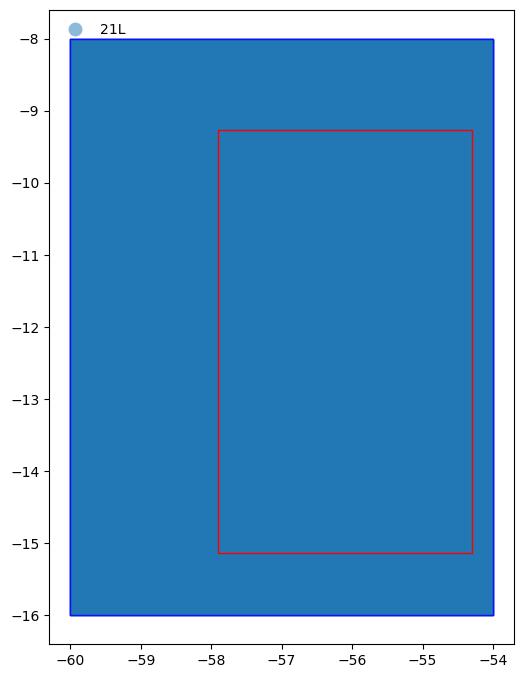

In [7]:
%matplotlib inline
fig, axes = plt.subplots(figsize=(6, 12))

#tiles are 
gdf.plot(
    "io:tile_id",
    ax=axes,
    edgecolor="blue",
    categorical=True,
    aspect="equal",
    alpha=0.5,
    legend=True,
    legend_kwds={"loc": "upper left", "frameon": False, "ncol": 1},
)

#add polygon to show our study area
sa_gpd.plot(edgecolor="red", facecolor="none", ax=axes)

plt.show()

From the figure above we can see the whole study area (represented by the red rectangle) is within in the tiles (represented by the blue rectangles) returned by the `pystac` query. 

Now we are happy we know what datasets we wish to fetch, we can [use `odc-stac`](https://odc-stac.readthedocs.io/en/latest/) to fetch and load the data into memory, specifying the projection and spatial resolution we want as well as how we want data grouped in layers:

In [8]:
#projection
SMepsg = 3857  #https://epsg.io/3857 Geographic crs, units are m
SMepsg_str = "epsg:{0}".format(SMepsg)

#spatial resolution (in units of projection)
datares = 300

#https://odc-stac.readthedocs.io/en/latest/_api/odc.stac.load.html
lcxr = odc.stac.load(
    items,             #load the items from our query above
    groupby="start_datetime",  #create spatial layers that have the same timestamp     
    chunks={},         #use Dask to speed loading
    dtype='int',
    #next lines load study area at resolution specified by datares variable
    #without these entire image is returned at original resolution
    crs=SMepsg_str,    #specify the desired crs 
    resolution=datares,    #specify the desired spatial resolution (units as per crs)
    bbox=study_poly.bounds,    #specify bounding box in Lon/Lat (ignores crs units, use x,y to use crs units)
    resampling="mode"  #ensure sensible type for categorical data (options seem to be as for datacube.Datacube.load)
)

The data object we have created is an [`xarray`](https://xarray.dev/) [Dataset](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset) which is a dict-like collection of [DataArray](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray) objects with aligned dimensions. We can check the dimensions, coordinates, data and attributes (see `xarray` [terminology](https://docs.xarray.dev/en/stable/user-guide/terminology.html)): 

In [9]:
lcxr

<xarray.Dataset>
Dimensions:      (y: 2225, x: 1338, time: 6)
Coordinates:
  * y            (y) float64 -1.037e+06 -1.037e+06 ... -1.704e+06 -1.704e+06
  * x            (x) float64 -6.446e+06 -6.445e+06 ... -6.045e+06 -6.045e+06
    spatial_ref  int32 3857
  * time         (time) datetime64[ns] 2017-01-01 2018-01-01 ... 2022-01-01
Data variables:
    data         (time, y, x) int64 dask.array<chunksize=(1, 2225, 1338), meta=np.ndarray>

### Load Local Data

In the previous section we fetched data from an online repository and loaded it into memory. In the sections below we will continue to work with that (and you can skip to the <a href=#section2>next section</a> now, if you don't want to see how to save and/or read data from a local drive).

The [recommended](https://docs.xarray.dev/en/stable/user-guide/io.html) way to store `xarray` data structures is [netCDF](https://docs.unidata.ucar.edu/netcdf-c/current/faq.html#What-Is-netCDF), a binary file format for self-described datasets that originated in the geosciences. 

For example, to save the `xarray` Dataset we created above on disk as netCDF, we would use something like:
```python
lcxr.to_netcdf(os.path.join(notebook_folder,"MT-study-area.nc"))
```

Then to load the local netCDF file into a `xarray` Dataset we would use:
```python
lcxr_disk = xr.open_dataset(os.path.join(notebook_folder,"MT-study-area.nc"), decode_coords="all")
```

:::{tip}
If you have saved this notebook to a local machine, try uncommenting the code below and running it. Check you can see where the data has been saved on your local machine and note how the Dataset loaded is identical to the one you saved. 

In [10]:
#lcxr.to_netcdf(os.path.join(notebook_folder,"MT-study-area.nc"))
#lcxr_disk = xr.open_dataset(os.path.join(notebook_folder,"MT-study-area.nc"), decode_coords="all")
#lcxr_disk

<a name="section2"></a>
## 2. Visualisation

Our [dataset](https://planetarycomputer.microsoft.com/dataset/io-lulc-9-class) contains a 2D raster layer of land cover types for individual snapshots in time. Each map is a composite of land use/cover predictions for 9 classes throughout the year in order to generate a representative snapshot of each year. 

We can visualise these spatio-temporal data in a variety of different ways, both static and interactive. But before exploring these, we will [create a `matplotlib` colormap](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html) to display the 9 land cover classes with intuitive colors.   

{'No Data': 0, 'Water': 1, 'Trees': 2, 'Flooded vegetation': 4, 'Crops': 5, 'Built area': 7, 'Bare ground': 8, 'Snow/ice': 9, 'Clouds': 10, 'Rangeland': 11}


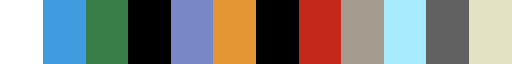

In [11]:
%matplotlib inline
#class names and IDs are held in an 'asset' of the collection
collection = catalog.get_collection("io-lulc-9-class")
ia = ItemAssetsExtension.ext(collection)
iaa = ia.item_assets["data"]

#get the names of the land cover classes with their ID in the raster (as a dictionary, name:ID)
class_names = {iaa["summary"]: iaa["values"][0] for iaa in iaa.properties["file:values"]}

#flip the keys:values in the dictionary (to create ID:name)
values_to_classes = {v: k for k, v in class_names.items()}

max_class = max(values_to_classes.keys())

#construct a matplotlib colormap
with rio.open(items[0].assets["data"].href) as src:
    colormap_def = src.colormap(1)  # get metadata colormap for band 1
    colormap = [
        np.array(colormap_def[i]) / 255 for i in range(max_class+1)
    ]  # transform to matplotlib color format
lc_cmap = mplc.ListedColormap(colormap)
print(class_names)
lc_cmap

:::{note}
Note that there are more than 9 colours in the `colormap` created - that's because we also have colours for _'No Data'_ and for class IDs that are not used (skipped) in the data (e.g. there's no land cover class _6_ - we'll label these as _No Data_ below). 

Now we can use the colormap with [`matplotlib`](https://matplotlib.org/stable/index.html) to plot a static 2D map for a given time point.

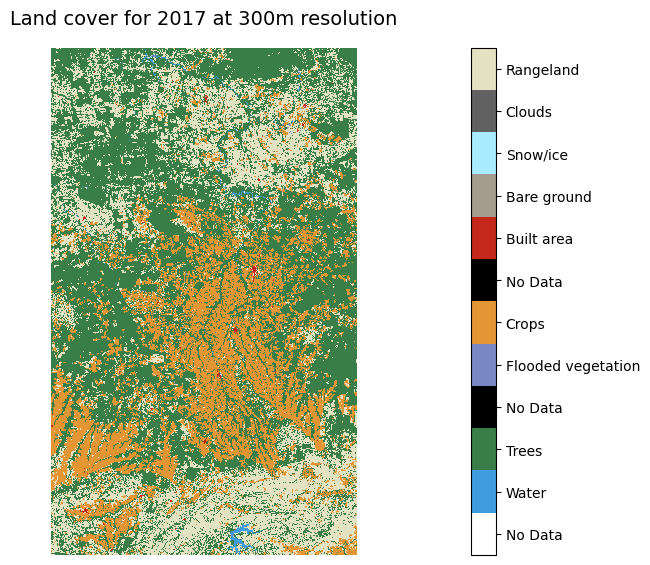

In [12]:
%matplotlib inline
ts='2017'  #which year layer

#plotting helpers
vmin = 0
vmax = lc_cmap.N

p=lcxr.sel(time=ts).isel(time=0).to_array("band").plot.imshow(
    col="band",
    cmap=lc_cmap,
    vmin=vmin, vmax=vmax,
    size=6
)

ticks = np.linspace(start=vmin+0.5, stop=vmax-0.5, num=vmax)
labels = [values_to_classes.get(i, "No Data") for i in range(vmax)]
p.cbar.set_ticks(ticks, labels=labels)
plt.axis('scaled')
plt.axis('off')
plt.title("Land cover for {0} at {1}m resolution".format(ts, datares), size=14)
plt.show()

Similarly, we could make a static plot showing maps for each point in time to visually examine change.

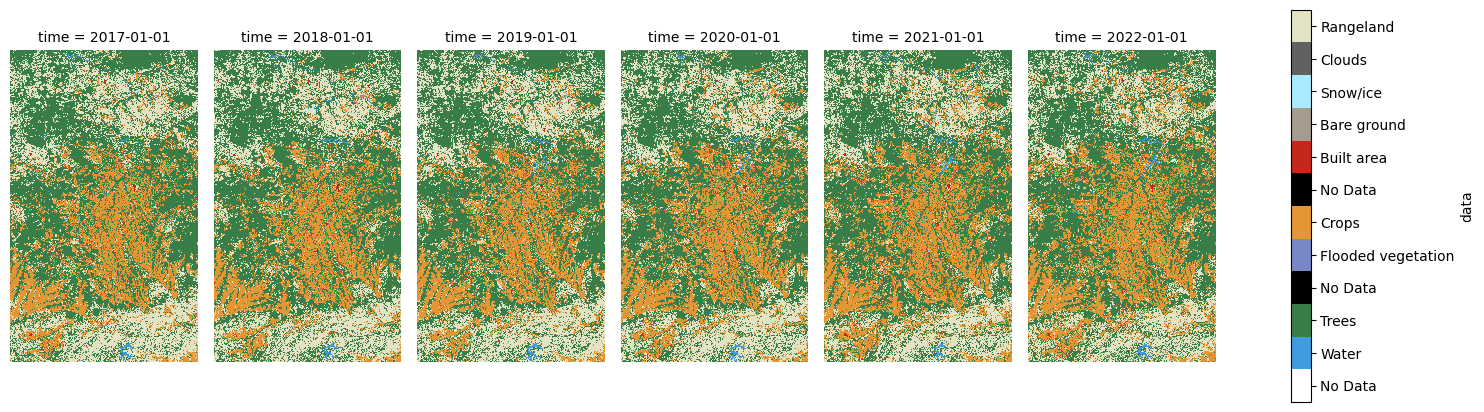

In [13]:
%matplotlib inline
p = lcxr.data.plot(
    col="time",
    cmap=lc_cmap,
    vmin=vmin, vmax=vmax,
    figsize=(16, 5)
)
ticks = np.linspace(start=vmin+0.5, stop=vmax-0.5, num=vmax)
labels = [values_to_classes.get(i, "No Data") for i in range(vmax)]
p.cbar.set_ticks(ticks, labels=labels)

for axes in p.axes.flat:
    axes.axis('off')
    axes.axis('scaled')

We can use [`holoviews`](https://holoviews.org/) to create an interactive plot - you should be able to use the slider below to see change through time in the same space. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:DynamicMap   [time]
   :Image   [x,y]   (data)
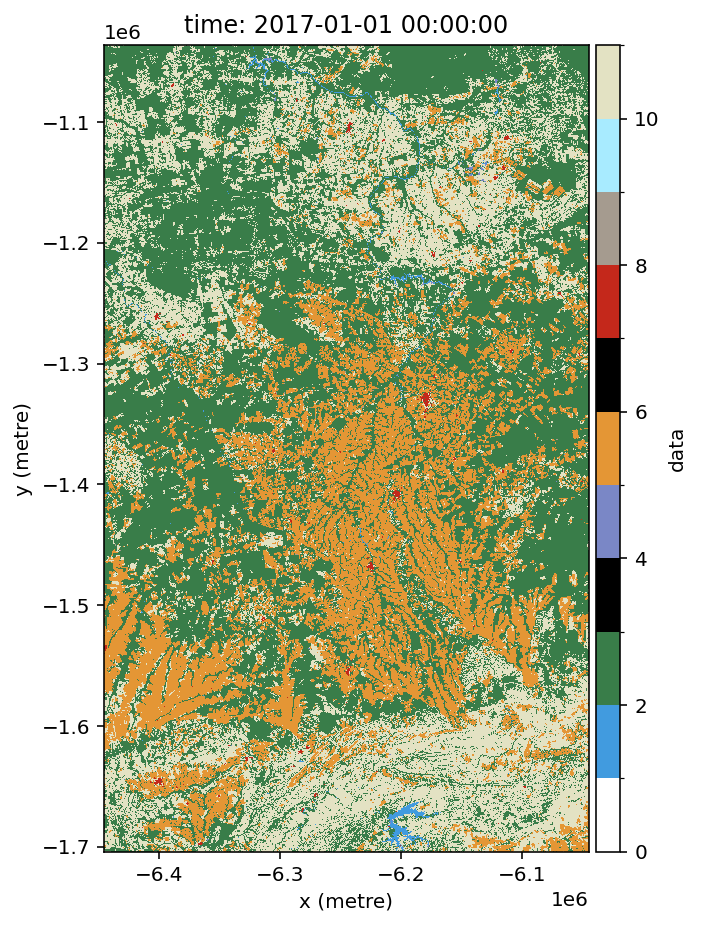

In [14]:
#plotting helpers
levels = [i for i in range(lc_cmap.N)]
bnorm = mplc.BoundaryNorm(levels, ncolors=len(levels))

#https://holoviews.org/user_guide/Gridded_Datasets.html?highlight=dask#working-with-xarray-data-types
hv.extension('matplotlib')
hv_ds = hv.Dataset(lcxr)[:, :, :]

lcmaps = hv_ds.to(hv.Image, kdims=["x", "y"], dynamic=True).options(cmap=lc_cmap, norm=bnorm, fig_inches=(5,8), colorbar=True)
lcmaps

<a name="section3"></a>
## 3. Analysing Aggregate Change

In this section we're going to examine land cover change across the study area. Our aim is to produce a bar plot that shows increases or decreases in land area for each land cover class between two points in time.  

We can quickly identify the unique values in our land cover maps and how many times they are observed (i.e. how many pixels fall in each land cover class). We can use `numpy`'s `.unique` [function](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) to [count the occurrence of each value](https://stackoverflow.com/a/28663910), then output as a `Pandas` DataFrame.

In [15]:
#list to hold pixel counts, class ID:name dict as list to append to 
counts_ls = [values_to_classes]

#loop over items
for i, j in enumerate(items):
    lcmap = lcxr.isel(time=i).to_array("band")            #get pixels for this year as an array
    unique, counts = np.unique(lcmap, return_counts=True)  #get the unique values and corresponding counts 
    lcmap_counts = dict(zip(unique, counts))               #combine them into a dict for easier viewing
    counts_ls.append(lcmap_counts)    

counts_df = pd.DataFrame(counts_ls).T     #create df from list and transpose

#create list of data years as string
counts_yr = list(lcxr["time"].values.astype('datetime64[Y]').astype('str'))  

counts_yr.insert(0, "Land Cover")        #insert 'LC'
counts_df.columns = counts_yr            #then use as df header
counts_df                                #print

Land Cover     2017     2018     2019     2020     2021     2022
0              No Data      NaN      NaN      NaN      NaN      NaN      NaN
1                Water    11414    12011    13848    13921    14273    14892
2                Trees  1485124  1506206  1489276  1474662  1477771  1472174
4   Flooded vegetation     1157     1532     2369     1435     1358     1437
5                Crops   683380   678552   685153   737470   793002   833377
7           Built area     5583     5882     5929     6243     6546     6973
8          Bare ground     4859     2589     6022     6758     5217     4654
9             Snow/ice      NaN      NaN      NaN      NaN      NaN      NaN
10              Clouds      NaN      NaN      NaN      NaN      NaN      NaN
11           Rangeland   785533   770278   774453   736561   678883   643543

It might be more intuitve (and useful) to work in units of area (e.g. square km) rather than pixel counts, so let's convert the pixel counts to area (sq km):

In [16]:
def cell_to_sqkm(x):
    return x * ((datares*datares) / 1000000)

sqkm_df = counts_df.copy(deep=False)
sqkm_df.loc[:,'2017':] = sqkm_df.loc[:,'2017':].apply(cell_to_sqkm)

sqkm_df

Land Cover       2017       2018       2019       2020       2021  \
0              No Data        NaN        NaN        NaN        NaN        NaN   
1                Water    1027.26    1080.99    1246.32    1252.89    1284.57   
2                Trees  133661.16  135558.54  134034.84  132719.58  132999.39   
4   Flooded vegetation     104.13     137.88     213.21     129.15     122.22   
5                Crops    61504.2   61069.68   61663.77    66372.3   71370.18   
7           Built area     502.47     529.38     533.61     561.87     589.14   
8          Bare ground     437.31     233.01     541.98     608.22     469.53   
9             Snow/ice        NaN        NaN        NaN        NaN        NaN   
10              Clouds        NaN        NaN        NaN        NaN        NaN   
11           Rangeland   70697.97   69325.02   69700.77   66290.49   61099.47   

         2022  
0         NaN  
1     1340.28  
2   132495.66  
4      129.33  
5    75003.93  
7      627.57  
8      418.86  
9         NaN  
10        NaN  
11   57918.87

We can see that some land cover classes are not present in any year (indicated by `NaN`). We'll drop these and also [reshape the data from 'wide' to 'long'](https://pandas.pydata.org/docs/getting_started/intro_tutorials/07_reshape_table_layout.html#wide-to-long-format) for plotting. 

In [17]:
sqkm_df = sqkm_df.dropna()    #drop No Data rows

#make data long
sqkm_df_long = pd.melt(sqkm_df, id_vars=['Land Cover'])
sqkm_df_long.rename(columns={'variable':'Year','value':'Area (sq km)'}, inplace = True)

From the `Pandas` DataFrame we can create both static and interactive bar plots. Here's the static version with `matplotlib`. 

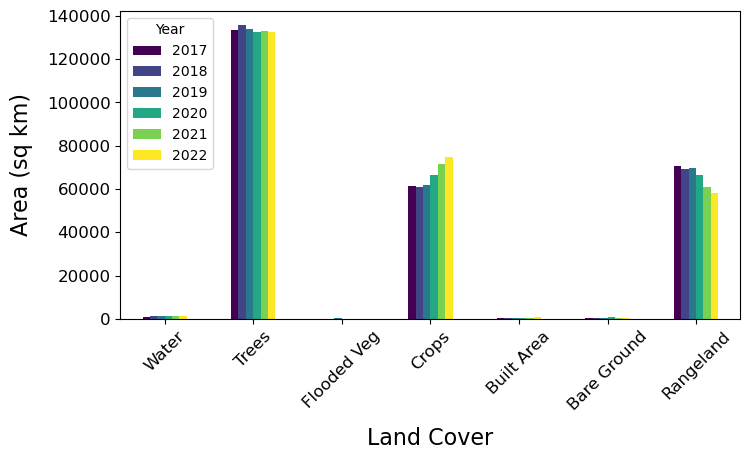

In [18]:
%matplotlib inline
fig, ax1 = plt.subplots(1, figsize=(8,4))

#drop NAN rows from data when plotting
sqkm_df[sqkm_df['2017'] > 0].set_index('Land Cover').plot(kind='bar', ax=ax1, cmap='viridis')

x_ticks_labels = ['Water','Trees','Flooded Veg','Crops', 'Built Area', 'Bare Ground', 'Rangeland']
ax1.set_xticklabels(x_ticks_labels, rotation=45)

plt.tick_params(labelsize=12)  
plt.xlabel('Land Cover', labelpad=10, fontsize=16)
plt.ylabel("Area (sq km)",labelpad=10, fontsize=16)     
plt.legend(title="Year")
plt.show()

:::{tip}
We could also do an interactive plot with `hvplot` for Pandas data (see the cell below).

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
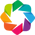

:Bars   [Land Cover,Year]   (Area (sq km))

In [19]:
hv.extension('bokeh')
color_lst = [mplc.to_hex(colormap[1]),mplc.to_hex(colormap[2]),mplc.to_hex(colormap[4]),
             mplc.to_hex(colormap[5]),mplc.to_hex(colormap[7]),mplc.to_hex(colormap[8]),mplc.to_hex(colormap[11])]
lc_year_bar = sqkm_df_long.hvplot.bar(y='Area (sq km)', x='Land Cover', by='Year', rot=90).options(
    color='Land Cover', cmap=color_lst, show_legend=False)
lc_year_bar

:::{note}
From the plots above we can see that through time the _Trees_ and _Rangeland_ classes have decreased in area, while _Crops_ has increased. 

We could also show this by calculating and plotting the change between first and final time snapshot. 

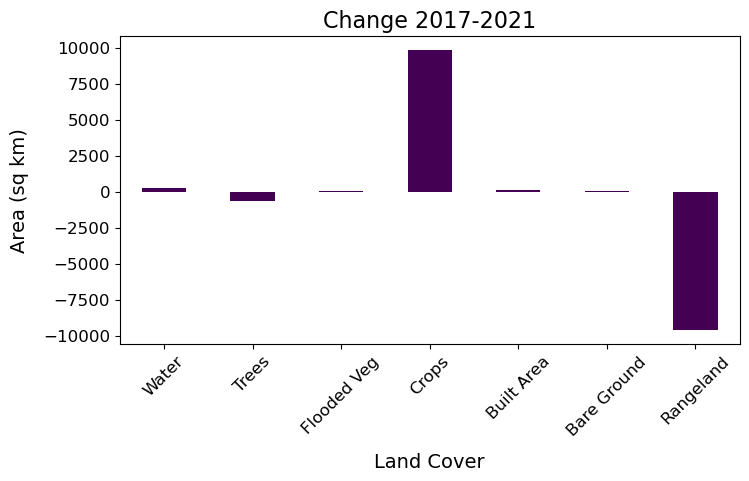

In [20]:
%matplotlib inline
#calculate
sqkm_df['Diffc-1721'] = sqkm_df['2021'] - sqkm_df['2017']

#plot
fig, ax1 = plt.subplots(1, figsize=(8,4))
sqkm_df['Diffc-1721'].plot(kind='bar', ax=ax1, cmap='viridis')
x_ticks_labels = ['Water','Trees','Flooded Veg','Crops', 'Built Area', 'Bare Ground', 'Rangeland']
ax1.set_xticklabels(x_ticks_labels, rotation=45)
plt.title("Change 2017-2021", size=16)
plt.tick_params(labelsize=12)  
plt.xlabel('Land Cover', labelpad=10, fontsize=14)
plt.ylabel("Area (sq km)",labelpad=10, fontsize=14)     
plt.show()

<a name="section4"></a>
## 4. Analysing Pixel-by-Pixel Change
In the last section we saw overall change in the land covers (e.g. decrease in _Trees_ and _Rangeland_, increase in _Crops_). But which classes were changing to which other classes? 

To understand the _transitions_ between each class we need to analyse change for each pixel individually. We'll enumerate individual pixels' transitions for the first and last time snapshots using the a _confusion matrix_ (using  a [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from `sklearn` and then visualise using a Sankey diagram (using `holoviews`). 

First, the confusion matrix.

In [21]:
#connvert xarray DataArrays to numpy arrays
lc2017 = lcxr.sel(time='2017').isel(time=0).to_array("band").values.flatten()
lc2021 = lcxr.sel(time='2021').isel(time=0).to_array("band").values.flatten()

#create the confustion matrix using sklearn
conf = metrics.confusion_matrix(lc2017, lc2021)

#output as Pandas DF (drop no data land covers)
conf_pd = pd.DataFrame(conf,
                       index=sqkm_df[sqkm_df['2017'] != None]['Land Cover'],
                       columns=sqkm_df['Land Cover'])
conf_pd

Land Cover          Water    Trees  Flooded vegetation   Crops  Built area  \
Land Cover                                                                   
Water               10185      473                  66      74          10   
Trees                2577  1410068                 245   23500         180   
Flooded vegetation    214      100                 678       7           0   
Crops                 167     9397                   3  638037         476   
Built area              5       60                   1     125        5227   
Bare ground            15      179                  42    2221          15   
Rangeland            1110    57494                 323  129038         638   

Land Cover          Bare ground  Rangeland  
Land Cover                                  
Water                         5        601  
Trees                       504      48050  
Flooded vegetation           15        143  
Crops                      1746      33554  
Built area                    5        160  
Bare ground                1251       1136  
Rangeland                  1691     595239

From [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix), the result is a:

>confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

So for us, this means 2017 classes are the rows, with 2021 classes in columns (there are no predictions here - the 2021 observations are in place of any prediction). The number of cells that did not change are on the diagonal.

:::{note}
This shows the most frequent transition was from Rangeland to Crops with 129,038 cells. Given that each cell is 9 hectares (300m x 300m) that means more than 1.1 million hectares (11,000 sq km) changed from pasture to cropland over the four years!

Now we can use the confusion matrix (after some manipulation) to create an [interactive Sankey diagram using holoviews](https://holoviews.org/reference/elements/matplotlib/Sankey.html) to visualise the transitions between each of the classes. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
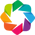

:Sankey   [From,To]   (Transition)

In [22]:
#create the nodes
lc_nodes = list(conf_pd.index) + list(conf_pd.index)
nodes = hv.Dataset(enumerate(lc_nodes), 'index', 'label')

#create the edges (flows between nodes)
#list of source lcs
sourcelc = []
for i in range(0, 7):
    sourcelc += [i] * 7
#list of target lcs
targetlc = list(range(7,14))
targetlc *= 7    
                 
#list of transition counts    
conf_list = conf.flatten().tolist()  
#convert to area and round (for hover display)
conf_sqkm_list = list(map(cell_to_sqkm, conf_list))
conf_sqkm_list = [round(item) for item in conf_sqkm_list]

#combine lists for sankey
edges_sqkm = list(zip(sourcelc, targetlc, conf_sqkm_list))

#from holoviews import opts, dim
hv.extension('bokeh')
value_dim = hv.Dimension('Transition', unit='sq km')

#create the sankey from the edges and nodes
transitions = hv.Sankey((edges_sqkm, nodes), ['From', 'To'], vdims=value_dim)

transitions = transitions.opts(
    opts.Sankey(labels='label', label_position='right', show_values=False, width=900, height=300, cmap=color_lst,
                edge_color=dim('From').str(), node_color=dim('label').str()))
transitions

Using the data objects we created to make the Sankey diagram, we can also view the most frequent transitions in a table:

In [23]:
edges = list(zip(sourcelc, targetlc, conf_list))                   #edges as counts
trans_df = pd.DataFrame(edges, columns =['From', 'To', 'Count'])   #convert edges list of tuples to pandas df

nodes_dict = dict(zip(list(nodes['index']),list(nodes['label'])))  #create dictionary for next replace calls
trans_df['From'].replace(to_replace=nodes_dict, inplace=True)      #replace ids with labels
trans_df['To'].replace(to_replace=nodes_dict, inplace=True)        #replace ids with labels

trans_df = trans_df[trans_df['To'] != trans_df['From']]            #remove rows of 'no transition'
trans_df['Area (sqkm)'] = trans_df['Count'].apply(cell_to_sqkm)    #add area column
trans_df.sort_values('Count', ascending=False).head()              #output head, sorted

From         To   Count  Area (sqkm)
45  Rangeland      Crops  129038     11613.42
43  Rangeland      Trees   57494      5174.46
13      Trees  Rangeland   48050      4324.50
27      Crops  Rangeland   33554      3019.86
10      Trees      Crops   23500      2115.00

:::{note}
Now we can see that although large numbers of cells changed from Rangeland to other land covers, there were also relatively large numbers of cells changing into Rangeland. Check you can see this in the Sankey diagram above. 

<a name="section5"></a>
## 5. Analysing Zonal Change

Above we have analysed the data for our entire study area and on a pixel-by-pixel basis. But sometimes we want to work at a level between the entire study area and individuals, using zones that belong to some kind of vector geography. This is where raster [zonal statistics](https://gisgeography.com/zonal-statistics/) come in:

> Zonal Statistics uses groupings to calculate statistics for specified zones.

The statistics are summary statistics (e.g. mean, median, standard deviation) of all the pixels that fall in each zone. The zones might be watersheds, biomes or ecoregions (physically) or states, countries, counties or census districts (socio-economically).  

Here, we'll use municipality boundaries as zones. For Brazil these are freely available online in (zipped) shapefile format which we can read using [GeoPandas](https://geopandas.org) (which inherits from [Pandas](https://pandas.pydata.org/)).

In [24]:
#load shapefile for municipalities
zipfile = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/UFs/MT/MT_Municipios_2021.zip"
munis = gpd.read_file(zipfile)
munis.head()

CD_MUN          NM_MUN SIGLA  AREA_KM2  \
0  5100102        Acorizal    MT   850.763   
1  5100201        Água Boa    MT  7549.308   
2  5100250   Alta Floresta    MT  8955.410   
3  5100300   Alto Araguaia    MT  5402.308   
4  5100359  Alto Boa Vista    MT  2248.414   

                                            geometry  
0  POLYGON ((-56.22987 -14.98368, -56.22538 -14.9...  
1  POLYGON ((-53.09875 -13.63518, -52.93808 -13.6...  
2  POLYGON ((-55.86740 -9.44394, -55.86829 -9.445...  
3  POLYGON ((-53.23920 -16.80826, -53.23884 -16.8...  
4  POLYGON ((-51.40209 -11.57606, -51.40099 -11.5...

### Data Manipulation
Before we can use these data with the raster data we need to do some manipulation, including:
- setting the `dtype` of the _CD_MUN_ series appropriately
- setting the map projection to be consistent with that for the raster land cover data (we'll also do this for the study area polygon we made above)

In [25]:
#munis.dtypes                                  #check dtypes
munis['CD_MUN'] = munis['CD_MUN'].astype(int)  #set appropriate for muni code
#munis.crs                                     #check projection
munis = munis.to_crs(SMepsg)                   #reproject to match our raster data
sa_gpd = sa_gpd.to_crs(SMepsg)         #also reproject sa_polygon

And now we can plot to check things are aligning nicely and to visualise our zones (municipalities).

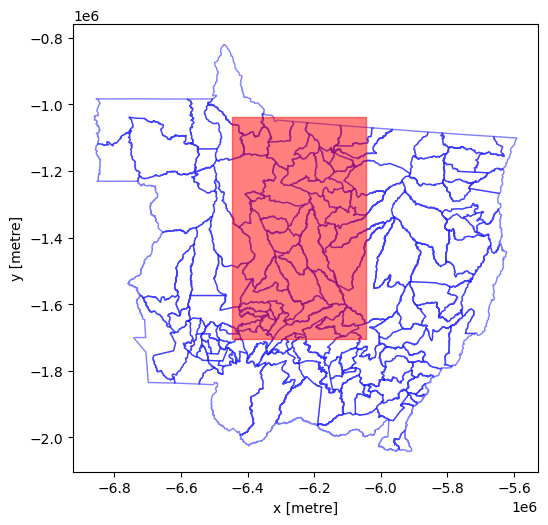

In [26]:
%matplotlib inline
fig, axes = plt.subplots(figsize=(6, 12))

munis.plot(
    ax=axes,
    edgecolor="blue",
    facecolor='None',
    categorical=True,
    aspect="equal",
    alpha=0.5
)

#add polygon to show our study area
sa_gpd.plot(edgecolor="red", facecolor="red", alpha=0.5, ax=axes)
axes.set_xlabel('x [metre]')
axes.set_ylabel('y [metre]')
plt.show()

:::{tip}
We could also do an interactive plot with `hvplot` for Pandas data (not shown here to reduce notebook filesize - uncomment to run yourself). 

In [27]:
#import hvplot.pandas  
#munis.hvplot(
#    geo=True,crs=munis.crs.to_epsg(),alpha=0.25, tiles=True) * sa_gpd.hvplot(
#    geo=True,crs=sa_gpd.crs.to_epsg(), alpha=0.25)

Let's also make a static plot with matplotlib to visualise municipality boundaries over the raster land cover data.

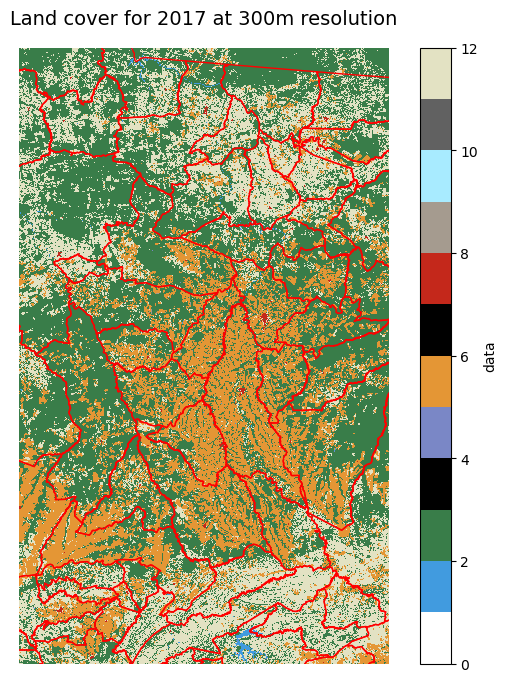

In [28]:
%matplotlib inline
fig,ax1=plt.subplots(figsize=(8,8))

#year 2017 is in the 0 position of lcxr['data']
lcxr['data'][0].plot(
    cmap=lc_cmap,
    vmin=vmin,
    vmax=vmax,
    ax=ax1
)

munis.plot(ax=ax1, facecolor='None', edgecolor='red', linewidth=1)

ax1.set_xlim(min(lcxr['data'][0].x), max(lcxr['data'][0].x)) 
ax1.set_ylim(min(lcxr['data'][0].y), max(lcxr['data'][0].y)) 
plt.axis('off')
plt.title("Land cover for {0} at {1}m resolution".format(ts, datares), size=14)
plt.show()

Before we do our zonal statistics, to make comparison fair we will consider only those municipalities whose boundaries are completely within the study area. 

First, remove municipalities from the vector shapefile that are not completely within the study area.

<Axes: >

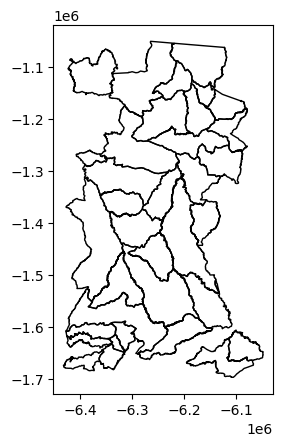

In [29]:
%matplotlib inline
pip_mask = munis.within(sa_gpd.loc[0, 'geometry'])  #spatial query: select only munis within study area
sa_munis = munis[pip_mask==True]                    #remove non-selected munis
sa_munis.plot(facecolor='None')                     #check by plotting

Next, create a raster from the new vector shapefile to mask cells from our land cover raster.

In [30]:
#collapse to list for rio.features.rasterize below
sa_munis_shapes = sa_munis[['geometry', 'CD_MUN']].values.tolist()

#get the spatial transform data needed for rio.features.rasterize below
lcxr_transform = lcxr['data'][0].rio.transform()   #this only works if rioxarray has been loaded - why? 

#create the mask raster (cells are CD_MUN for municipality polygons within study area, else -999)
sa_munis_r = rio.features.rasterize(sa_munis_shapes, fill=-999, 
                                    out_shape=lcxr['data'][0].shape, 
                                    transform=lcxr_transform) 

#create xarray DataArray from the new raster
sa_munis_xr = xr.DataArray(data=sa_munis_r,
                           name='Municipality code',
                           dims=["y", "x"],
                           coords={'y':('y',lcxr.y.data),
                                   'x':('x',lcxr.x.data)})

Let's visualise the raster we've created from the vector shapefile of municipality boundaries.

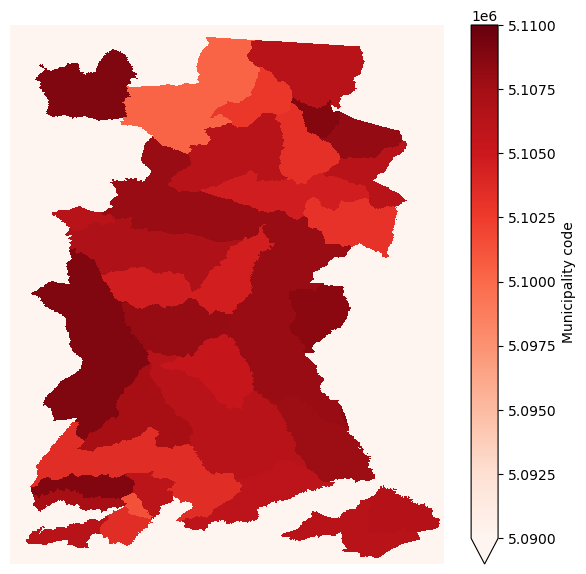

In [31]:
%matplotlib inline
fig,ax1=plt.subplots(figsize=(7,7))

sa_munis_xr.plot.imshow(
    cmap='Reds',
    vmin=5090000, vmax=5110000,
    ax=ax1
)

plt.axis('off')
plt.show()

And finally, mask the existing land cover `xarray` DataSet with this new `xarray` DataArray.

In [32]:
#mask original land cover xarray with new xarray
lcxr_mask = lcxr.where(sa_munis_xr >0)  #nodata was set to -999

Now let's check the mask worked by plotting the new (masked) land cover data with the municipality polygons overlaid.

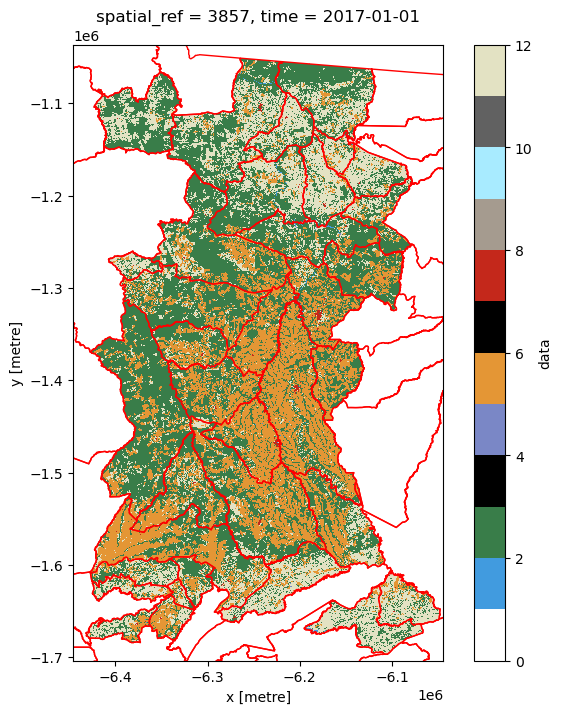

In [33]:
%matplotlib inline
fig,ax1=plt.subplots(figsize=(8,8))

p = lcxr_mask['data'][0].plot(
    cmap=lc_cmap,
    vmin=vmin,
    vmax=vmax,
    ax=ax1
)

munis.plot(ax=ax1, facecolor='None', edgecolor='red', linewidth=1)

ax1.set_xlim(min(lcxr['data'][0].x), max(lcxr['data'][0].x)) 
ax1.set_ylim(min(lcxr['data'][0].y), max(lcxr['data'][0].y)) 

plt.show()

:::{note} 
From this plot you should be able to start thinking about the land cover composition of each municipality, and how they might differ. For example, which are the municipalities with relatively high (or low) crop cover compared to rangeland cover?

One last piece of data manipulation is needed as the [`zonal_stats` function](https://pythonhosted.org/rasterstats/manual.html#zonal-statistics) we will use from the [rasterstats package](https://pypi.org/project/rasterstats/) expects a 2D array in a format that can be read by the [rasterio package](https://pypi.org/project/rasterio/) (e.g. a `numpy array`). Hence data are for a single year of our data set. 

In [34]:
lcxr_transform = lcxr_mask['data'][0].rio.transform()     #get the spatial transform info 
lcxr_17 = np.array(lcxr_mask['data'][0].astype('int32'))  #convert data for 2017 to numpy array

### Zonal Stats

Now we're ready to actually calculate the statistics from the land cover raster by municipality shapefile polygon. When [specifying that our input raster is categorical](https://pythonhosted.org/rasterstats/manual.html#working-with-categorical-rasters) (as is the case for our land cover data), the `zonal_stats` function returns a list of dictionaries, one for each municipality polgyon. In turn, each dictionary provides cell counts (values) for each (land cover) class (keys).

In [35]:
#from rasterstats import zonal_stats
lcxr_17z = zonal_stats(sa_munis, lcxr_17,
                           affine=lcxr_transform,
                           categorical=True)
lcxr_17z   

[{1: 467, 2: 55424, 4: 1, 5: 6225, 7: 296, 8: 79, 11: 40802},
 {2: 1298, 5: 1340, 7: 71, 11: 2264},
 {1: 390, 2: 9892, 5: 1536, 7: 49, 8: 54, 11: 16024},
 {1: 76, 2: 28919, 5: 12480, 7: 79, 8: 90, 11: 3094},
 {1: 262, 2: 10150, 4: 12, 5: 2246, 7: 118, 8: 32, 11: 23202},
 {1: 4, 2: 3926, 5: 7005, 7: 28, 8: 3, 11: 4240},
 {1: 15, 2: 33223, 4: 7, 5: 49192, 7: 188, 8: 63, 11: 15496},
 {1: 34, 2: 14085, 4: 20, 5: 24556, 7: 39, 8: 284, 11: 972},
 {1: 20, 2: 17018, 4: 5, 5: 13094, 7: 80, 8: 147, 11: 3680},
 {1: 820, 2: 34203, 4: 79, 5: 6941, 7: 35, 8: 63, 11: 10356},
 {1: 90, 2: 12272, 5: 28703, 7: 340, 8: 107, 11: 1758},
 {1: 17, 2: 11858, 4: 21, 5: 5391, 7: 105, 8: 23, 11: 29141},
 {1: 26, 2: 8113, 5: 3555, 7: 39, 8: 16, 11: 4179},
 {1: 6, 2: 15114, 4: 2, 5: 4206, 7: 30, 8: 76, 11: 8255},
 {1: 618, 2: 9902, 5: 1429, 7: 17, 11: 27368},
 {1: 650, 2: 35901, 4: 16, 5: 5528, 7: 49, 8: 88, 11: 26713},
 {1: 40, 2: 51898, 4: 16, 5: 50012, 7: 264, 8: 333, 11: 10289},
 {1: 19, 2: 5981, 5: 2891, 7: 60

:::{tip} It's easier to analyse this output if we store it as a Pandas DataFrame.

In [36]:
lcxr_17z_pd = pd.DataFrame(lcxr_17z)                        #convert list of dicts to DataFrame
lcxr_17z_pd.set_index(sa_munis['NM_MUN'],inplace=True)      #use municipality name as index
lcxr_17z_pd.rename(columns=values_to_classes,inplace=True)  #rename columns using dict created above
lcxr_17z_pd = lcxr_17z_pd.add_suffix('17')                  #remind ourselves these data are for a given year
lcxr_17z_pd.head()     

Water17  Trees17  Flooded vegetation17  Crops17  Built area17  \
NM_MUN                                                                         
Alta Floresta    467.0    55424                   1.0     6225           296   
Arenápolis         NaN     1298                   NaN     1340            71   
Carlinda         390.0     9892                   NaN     1536            49   
Cláudia           76.0    28919                   NaN    12480            79   
Colíder          262.0    10150                  12.0     2246           118   

               Bare ground17  Rangeland17  
NM_MUN                                     
Alta Floresta           79.0        40802  
Arenápolis               NaN         2264  
Carlinda                54.0        16024  
Cláudia                 90.0         3094  
Colíder                 32.0        23202

We could examine these total counts, but in many ways it is more useful to consider the proportion of a muncipality that is covered by each land cover. 

In [37]:
lcxr_17z_pd['sum17']=lcxr_17z_pd.sum(axis=1)                  #add column for total cells in the muni

lcxr_17prop_pd = pd.DataFrame(index = lcxr_17z_pd.index)      #create a new DataFrame to hold the proportions

#calculate proportion for each land cover
for column in lcxr_17z_pd.loc[:,'Water17':'Rangeland17']:
    lcxr_17prop_pd['{}-prop'.format(column)] = lcxr_17z_pd[column] / lcxr_17z_pd['sum17']  
    
lcxr_17prop_pd.head()

Water17-prop  Trees17-prop  Flooded vegetation17-prop  \
NM_MUN                                                                 
Alta Floresta      0.004521      0.536566                   0.000010   
Arenápolis              NaN      0.261009                        NaN   
Carlinda           0.013956      0.353981                        NaN   
Cláudia            0.001699      0.646408                        NaN   
Colíder            0.007273      0.281772                   0.000333   

               Crops17-prop  Built area17-prop  Bare ground17-prop  \
NM_MUN                                                               
Alta Floresta      0.060265           0.002866            0.000765   
Arenápolis         0.269455           0.014277                 NaN   
Carlinda           0.054965           0.001753            0.001932   
Cláudia            0.278957           0.001766            0.002012   
Colíder            0.062351           0.003276            0.000888   

               Rangeland17-prop  
NM_MUN                           
Alta Floresta          0.395008  
Arenápolis             0.455258  
Carlinda               0.573412  
Cláudia                0.069158  
Colíder                0.644106

We could create a-spatial plots (e.g. bar plots) directly from this DataFrame. To create spatial plots (maps) we need to attach the spatial information for each municipality to create a GeoPandas GeoDataFrame:

In [38]:
lcxr_17prop_gpd = pd.merge(sa_munis, lcxr_17prop_pd, how='left', left_on = 'NM_MUN', right_index=True)
lcxr_17prop_gpd.head()

CD_MUN         NM_MUN SIGLA  AREA_KM2  \
2   5100250  Alta Floresta    MT  8955.410   
12  5101308     Arenápolis    MT   417.337   
26  5102793       Carlinda    MT  2421.788   
29  5103056        Cláudia    MT  3843.561   
31  5103205        Colíder    MT  3112.091   

                                             geometry  Water17-prop  \
2   POLYGON ((-6219130.124 -1056088.035, -6219229....      0.004521   
12  POLYGON ((-6330913.103 -1615920.187, -6330922....           NaN   
26  POLYGON ((-6212162.920 -1088961.922, -6211814....      0.013956   
29  POLYGON ((-6153965.646 -1263744.447, -6153909....      0.001699   
31  POLYGON ((-6175226.198 -1146318.365, -6175285....      0.007273   

    Trees17-prop  Flooded vegetation17-prop  Crops17-prop  Built area17-prop  \
2       0.536566                   0.000010      0.060265           0.002866   
12      0.261009                        NaN      0.269455           0.014277   
26      0.353981                        NaN      0.054965           0.001753   
29      0.646408                        NaN      0.278957           0.001766   
31      0.281772                   0.000333      0.062351           0.003276   

    Bare ground17-prop  Rangeland17-prop  
2             0.000765          0.395008  
12                 NaN          0.455258  
26            0.001932          0.573412  
29            0.002012          0.069158  
31            0.000888          0.644106

And now we can do a static plot to visualise the proportion of two land covers across the municipalities.

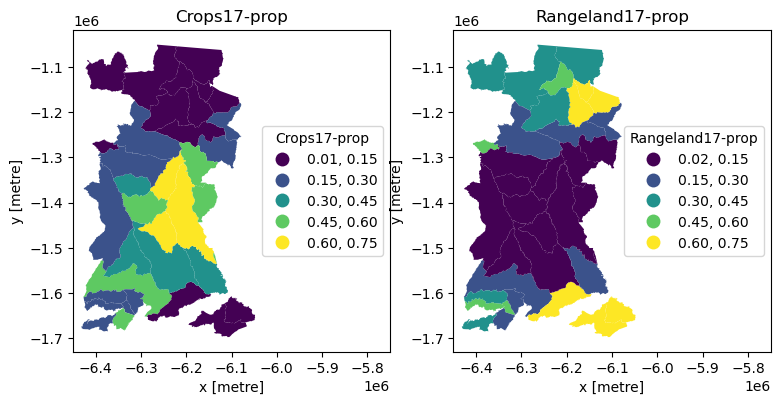

In [39]:
%matplotlib inline
cols = ['Crops17-prop','Rangeland17-prop']     #columns to plot
cbins = [0.15,0.3,0.45,0.6,0.75]               #classification bins for plotting

fig, ax = plt.subplots(1, 2, figsize=(9, 30))

for ix, col in enumerate(cols):
    lcxr_17prop_gpd.plot(
        column=col, cmap='viridis',
        scheme='UserDefined', 
        classification_kwds={'bins': cbins},  
        linewidth=0., 
        legend=True, legend_kwds={"title":col,"loc": 5},
        ax=ax[ix]
    )
    
    ax[ix].title.set_text(cols[ix])
    ax[ix].set_xlim(-6450000,-5750000)   #axis limits to fit legend
    ax[ix].set_xlabel('x [metre]')
    ax[ix].set_ylabel('y [metre]')

plt.show()

An interactive plot enables linked pan/zoom of the two variables (although without consistent classification of polygons). 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
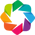

:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (Crops17-prop)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Rangeland17-prop)

In [40]:
cols = ['Crops17-prop','Rangeland17-prop']     #columns to plot

#import hvplot.pandas  # noqa
hv.extension('bokeh')
lcxr_17prop_interactive = lcxr_17prop_gpd.hvplot(
    c=cols[0],geo=True, crs=lcxr_17prop_gpd.crs.to_epsg(),cmap='viridis', title=cols[0]) + lcxr_17prop_gpd.hvplot(
    c=cols[1],geo=True, crs=lcxr_17prop_gpd.crs.to_epsg(),cmap='viridis', title=cols[1])

lcxr_17prop_interactive

:::{note} 
From these plots we should be able to see what we might have expected from the raster data: municipalities in the north and south of the study area are dominated by rangeland, while those in the centre are dominated more by cropland. We might then think about what social, economic, political or other characteristics of the municipalities have led to this situation. 

To examine change through time, we need to calculate the zonal stats for a second year, then calculate proportional change between the two time points. First the zonal stats. 

In [41]:
lcxr_21 = np.array(lcxr_mask['data'][4].astype('int32'))  #convert data for 2021 to numpy array

lcxr_21z = zonal_stats(sa_munis, lcxr_21,
                           affine=lcxr_transform,
                           categorical=True)

lcxr_21z_pd = pd.DataFrame(lcxr_21z)                        #convert list of dicts to DataFrame
lcxr_21z_pd.set_index(sa_munis['NM_MUN'],inplace=True)      #use municipality name as index
lcxr_21z_pd.rename(columns=values_to_classes,inplace=True)  #rename columns using dict created above
lcxr_21z_pd = lcxr_21z_pd.add_suffix('21')                  #remind ourselves these data are for a given year

lcxr_21z_pd['sum21']=lcxr_21z_pd.sum(axis=1)                  #add column for total cells in the muni
lcxr_21z_pd.head() 

Water21  Trees21  Flooded vegetation21  Crops21  Built area21  \
NM_MUN                                                                         
Alta Floresta      467    54865                   1.0     9039           337   
Arenápolis           2     1312                   NaN     2032            76   
Carlinda           390     9823                   NaN     2617            49   
Cláudia            607    26625                   1.0    14700            65   
Colíder            376    10263                   3.0     4660           140   

               Bare ground21  Rangeland21     sum21  
NM_MUN                                               
Alta Floresta          194.0        38391  103294.0  
Arenápolis               NaN         1551    4973.0  
Carlinda                80.0        14986   27945.0  
Cláudia                 76.0         2664   44738.0  
Colíder                 24.0        20556   36022.0

Now calculate the proportional change between the two years.

In [42]:
lcxr_1721z_pd = pd.merge(lcxr_17z_pd, lcxr_21z_pd, how='left', left_index = True, right_index=True)

lcxr_1721prop_pd = pd.DataFrame(index = lcxr_1721z_pd.index)      #create a new DataFrame to hold the proportions

lcpresent = ['Water','Trees','Flooded vegetation','Crops', 'Built area', 'Bare ground', 'Rangeland']

#calculate proportional change for each land cover
for column in lcpresent:
    initial = lcxr_1721z_pd['{}17'.format(column)]
    final = lcxr_1721z_pd['{}21'.format(column)]
    lcxr_1721prop_pd['{}-propD'.format(column)] = (final - initial) / initial  
    
lcxr_1721prop_pd.describe()

Water-propD  Trees-propD  Flooded vegetation-propD  Crops-propD  \
count    34.000000    35.000000                 15.000000    35.000000   
mean      0.546392     0.013755                  0.626822     0.414401   
std       1.542047     0.092306                  1.125911     0.465972   
min      -0.315789    -0.133255                 -0.750000     0.001309   
25%      -0.035096    -0.012748                  0.000000     0.078856   
50%       0.013201    -0.006975                  0.363636     0.231721   
75%       0.266516     0.011556                  1.104396     0.607837   
max       6.986842     0.430131                  3.571429     2.257058   

       Built area-propD  Bare ground-propD  Rangeland-propD  
count         35.000000          31.000000        35.000000  
mean           0.132359           0.264670        -0.218614  
std            0.112021           1.151980         0.124551  
min           -0.177215          -0.666667        -0.518625  
25%            0.074984          -0.253253        -0.319861  
50%            0.142857          -0.120419        -0.187844  
75%            0.202041           0.273100        -0.125082  
max            0.358974           5.500000        -0.014088

From the summary statistics we can already begin to see differences in the trajectories of change. To map change spatially we finally merge with the spatial information.

In [43]:
lcxr_1721prop_gpd = pd.merge(sa_munis, lcxr_1721prop_pd, how='left', left_on = 'NM_MUN', right_index=True)

Given that proportional change can be positive or negative, we should use a diverging colour palette.

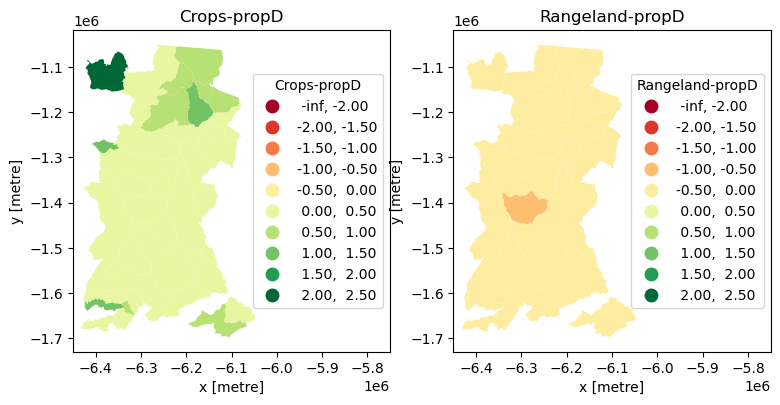

In [44]:
%matplotlib inline
cols = ['Crops-propD','Rangeland-propD']     #columns to plot
cbins = [-2,-1.5,-1,-0.5, 0, 0.5,1,1.5,2,2.5]               #classification bins for plotting

fig, ax = plt.subplots(1, 2, figsize=(9, 30))

for ix, col in enumerate(cols):
    lcxr_1721prop_gpd.plot(
        column=col, cmap='RdYlGn',   #colour palette
        scheme='UserDefined', 
        classification_kwds={'bins': cbins},  
        linewidth=0., 
        legend=True, legend_kwds={"title":col,"loc": 5},
        ax=ax[ix]
    )
    
    ax[ix].title.set_text(cols[ix])
    ax[ix].set_xlim(-6450000,-5750000)   #axis limits to fit legend
    ax[ix].set_xlabel('x [metre]')
    ax[ix].set_ylabel('y [metre]')

plt.show()

This allows us to see that all municipalities decreased their Rangeland cover and increased their Cropland cover between 2017 and 2021, and to locate municipalities with extremes of change (which we could then go and further investigate). 

## Summary
This notebook introduce manipulation and exploratory analysis of classified land cover data. Specifically, it: 
- <a href="#section1">used</a> `pystac-client` to access information from the [Microsoft's Planetary Computer API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/) and used that with `odc-stac` to read land cover raster data from an online repository.
- <a href="#section2">used</a> `matplotlib` and `holoviews` to visualise the spatio-temporal land cover data statically and interactively.
- <a href="#section4">used</a> from `sklearn` to create a matrix of pixel-by-pixel change and then `holoviews` to  visualise that change using a Sankey diagram.
- <a href="#section5">used</a> `rasterstats` to analyse zonal change with tabular data and visualisations.

## Citing this Notebook

Please see [CITATION.cff](https://github.com/eds-book-gallery/b128b282-dee7-44a7-bc21-f1fd21452a83/blob/main/CITATION.cff) for the full citation information. The citation file can be exported to APA or BibTex formats (learn more [here](https://docs.github.com/en/repositories/managing-your-repositorys-settings-and-features/customizing-your-repository/about-citation-files)).

## Additional information
**Dataset**: 10m Annual Land Use Land Cover (9-class) from Impact Observatory for 2017-2021.

**License**: The code in this notebook is licensed under the MIT License. The Environmental Data Science book is licensed under the Creative Commons by Attribution 4.0 license. See further details [here](https://github.com/alan-turing-institute/environmental-ds-book/blob/master/LICENSE.md).

**Contact**: If you have any suggestion or report an issue with this notebook, feel free to [create an issue](https://github.com/alan-turing-institute/environmental-ds-book/issues/new/choose) or send a direct message to [environmental.ds.book@gmail.com](mailto:environmental.ds.book@gmail.com).

In [45]:
from datetime import date

print('Notebook repository version: v1.0.2')
print(f'Last tested: {date.today()}')

Notebook repository version: v1.0.2
Last tested: 2023-09-02


## Outputs registration
The cell below is dedicated to save the notebook outputs for registering them into a Zenodo repository curated by the Environmental DS book.

In [46]:
outputs = {
    'static_tables': {
        'filenames': ['table_gdf-head', 'table_count','table_sqkm','table_confusionmatrix','table_transitions','table_munis-head','table_zonalstats2017-head','table_zonalstats2017proportion-head','table_zonalstats2021-head','table_zonalstats20172021-describe'],
        'data':[gdf.head(), counts_df, sqkm_df, conf_pd, trans_df.sort_values('Count', ascending=False).head(), munis.head(), lcxr_17z_pd.head(), lcxr_17prop_pd.head(), lcxr_21z_pd.head(), lcxr_1721prop_pd.describe()]},
    'interactive_figures_hvplot': {
        'filenames': ['interactive_studyarea','interactive_lcyearbars','interactive_transitions','interactive_zonalstats2017_proportion'],
        'data':[sa_gpd_interactive, lc_year_bar, transitions, lcxr_17prop_interactive]}
}

#save static tables
if len(outputs['static_tables']['filenames']) > 0:
    [data.to_csv(os.path.join(notebook_folder,outputs['static_tables']['filenames'][x] + '.csv')) for x, data in enumerate(outputs['static_tables']['data'])]

#save hvplot interactive figures
if len(outputs['interactive_figures_hvplot']['filenames']) > 0:
    [hvplot.save(data, os.path.join(notebook_folder,outputs['interactive_figures_hvplot']['filenames'][x]  + '.html')) for x, data in enumerate(outputs['interactive_figures_hvplot']['data'])]

#save single hvplot file (matplotlib backend)
hv.extension('matplotlib')
hvplot.save(lcmaps, os.path.join(notebook_folder,'interactive_lcmaps.html'))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W